## Entropy comparison (sequential vs pair)

This notebook reads the CSV logs produced by `fun/epo_ppo_sum10.py` and plots entropy over episodes for both modes.

- **Default behavior**: automatically picks the most recent `fun/csv_logs/*_entropy.csv` file.
- **If you want a specific file**: set `CSV_PATH` in the first code cell.



Using: fun\csv_logs\run_20260120_173022_entropy.csv


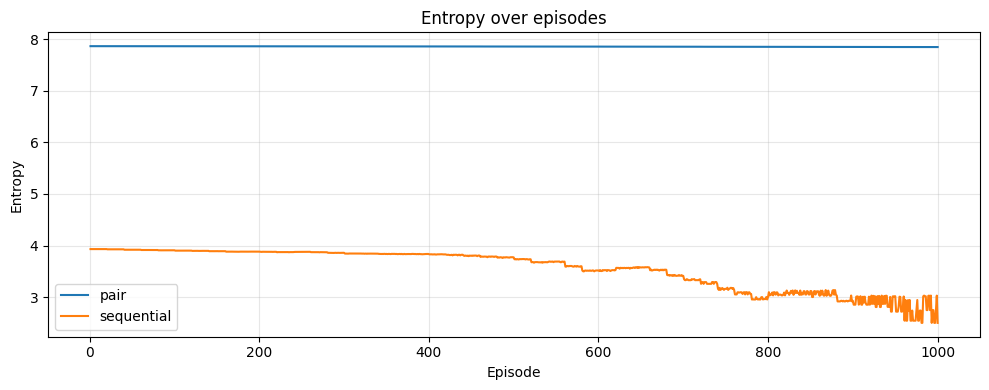

: 

In [ ]:
import csv
import glob
import os
from collections import defaultdict

import matplotlib.pyplot as plt

# Option A: hardcode a path
CSV_PATH = None  # e.g. "fun/csv_logs/run_YYYYMMDD_HHMMSS_entropy.csv"

# Option B: auto-pick latest
if CSV_PATH is None:
    candidates = glob.glob(os.path.join("csv_logs", "*_entropy.csv"))
    if not candidates:
        raise FileNotFoundError("No entropy CSV found under fun/csv_logs/. Run fun/epo_ppo_sum10.py first.")
    CSV_PATH = max(candidates, key=os.path.getmtime)

print("Using:", CSV_PATH)

rows = []
with open(CSV_PATH, "r", encoding="utf-8", newline="") as f:
    r = csv.DictReader(f)
    for row in r:
        row["episode"] = int(row["episode"])
        row["entropy"] = float(row["entropy"])
        rows.append(row)

by_mode = defaultdict(list)
for row in rows:
    by_mode[row["mode"]].append((row["episode"], row["entropy"]))

plt.figure(figsize=(10, 4))
for mode in sorted(by_mode.keys()):
    pts = sorted(by_mode[mode], key=lambda x: x[0])
    xs = [p[0] for p in pts]
    ys = [p[1] for p in pts]
    plt.plot(xs, ys, label=mode)

plt.title("Entropy over episodes")
plt.xlabel("Episode")
plt.ylabel("Entropy")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

